<a href="https://colab.research.google.com/github/wilferalexander/creditscoring/blob/main/CreditScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CREDIT SCORING PREDICTION**

---



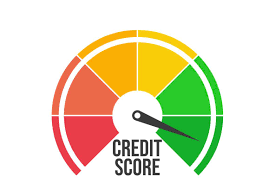

**Descripción del Proyecto**

Credit Scoring es un proyecto de machine learning enfocado en la predicción de la solvencia crediticia de los individuos. Este proyecto tiene como objetivo desarrollar un modelo predictivo que ayude a las instituciones financieras a tomar decisiones informadas sobre la concesión de créditos.



CREDIT SCORING PREDICTION

La importancia de reducir el riesgo crediticio es clave en el sector financiero. Nuestro cliente, una institución financiera alemana, ha reconocido la necesidad de adoptar enfoques innovadores para mejorar su capacidad de evaluar el riesgo crediticio de los clientes. La misión principal es identificar y clasificar a los clientes en dos categorías: "Buen Cliente (0)" y "Mal Cliente (1)". Este análisis permitirá a la institución tomar decisiones informadas y mitigar el riesgo de pérdidas crediticias.

---

Tus tareas principales serán:

1. **Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

2. **Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

3. **Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

4. **Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.
---


#**1. Configuración del Ambiente**


---


In [1]:
#Montamos la unidad de google donde se encuentra en dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
#Importamos librerias necesarias
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno ## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
global df_banco, resultados

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

#**2. Preprocesamiento de Datos**


---

In [157]:
df_banco = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Credit-Scoring-Prediction/Creditscoring/german_credit.csv')
df_banco.sample(5)

default account_check_status  duration_in_month  \
200        0  no checking account                  9   
137        1    0 <= ... < 200 DM                 12   
304        1  no checking account                 48   
236        1    0 <= ... < 200 DM                  6   
710        0  no checking account                 18   

                                        credit_history  \
200  critical account/ other credits existing (not ...   
137           existing credits paid back duly till now   
304  critical account/ other credits existing (not ...   
236           existing credits paid back duly till now   
710  critical account/ other credits existing (not ...   

                          purpose  credit_amount                      savings  \
200  (vacation - does not exist?)            936        500 <= ... < 1000 DM    
137           domestic appliances            766        500 <= ... < 1000 DM    
304                     car (new)          10127        500 <= ... < 1000 DM    
236                     car (new)          14555  unknown/ no savings account   
710           domestic appliances            629        500 <= ... < 1000 DM    

      present_emp_since  installment_as_income_perc personal_status_sex  \
200       .. >= 7 years                           4       male : single   
137  1 <= ... < 4 years                           4       male : single   
304  1 <= ... < 4 years                           2       male : single   
236          unemployed                           1       male : single   
710       .. >= 7 years                           4       male : single   

    other_debtors  present_res_since  \
200          none                  2   
137          none                  3   
304          none                  2   
236          none                  2   
710          none                  3   

                                              property  age  \
200  if not A121/A122 : car or other, not in attrib...   52   
137                                        real estate   66   
304                              unknown / no property   44   
236  if not A121 : building society savings agreeme...   23   
710  if not A121 : building society savings agreeme...   32   

    other_installment_plans   housing  credits_this_bank  \
200                    none       own                  2   
137                    none       own                  1   
304                    bank  for free                  1   
236                    none       own                  1   
710                    bank       own                  2   

                                                   job  \
200                        skilled employee / official   
137                               unskilled - resident   
304                        skilled employee / official   
236               unemployed/ unskilled - non-resident   
710  management/ self-employed/ highly qualified em...   

     people_under_maintenance                                  telephone  \
200                         1  yes, registered under the customers name    
137                         1                                       none   
304                         1                                       none   
236                         1  yes, registered under the customers name    
710                         1  yes, registered under the customers name    

    foreign_worker  
200            yes  
137            yes  
304            yes  
236            yes  
710            yes

### 2.1 Validación del dataframe

---


In [158]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

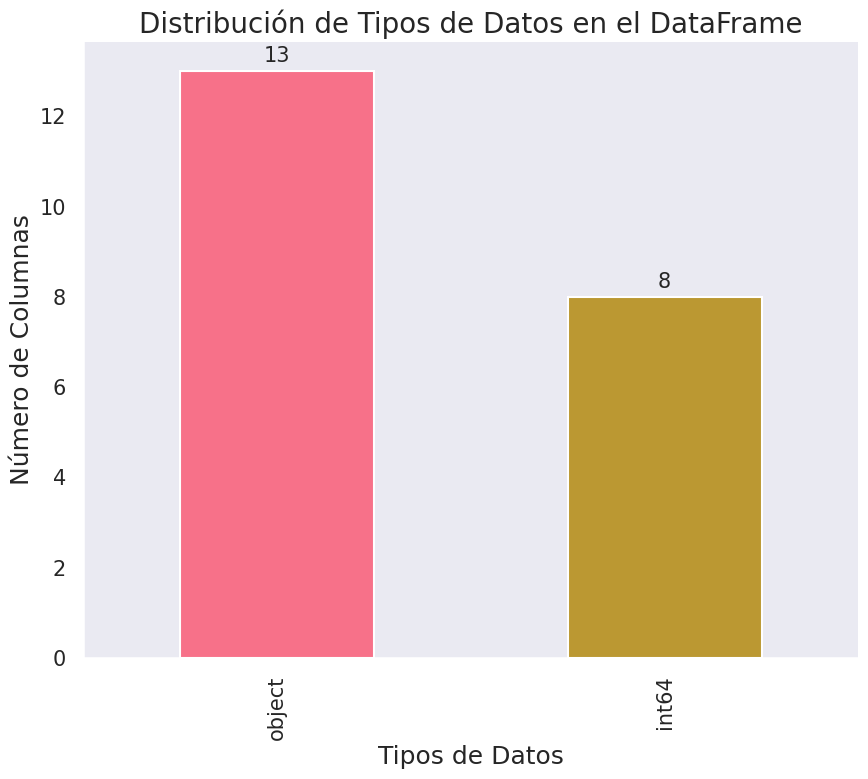

In [159]:
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_banco.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [160]:
#Información de los datos
print("Número de filas: ",df_banco.shape[0])
print("Número de Columnas:",df_banco.shape[1])
print("Datos Duplicados",df_banco.duplicated().sum())
print("Variables Categóricas: ",df_banco.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_banco.select_dtypes(exclude='object').shape[1])

Número de filas:  1000
Número de Columnas: 21
Datos Duplicados 0
Variables Categóricas:  13
Variables Numéricas:  8


Contamos con 13 variables categoricas y 8 variables numericas

In [161]:
## Validando las columnas de nuestro dataframe
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [162]:
df_banco.describe()

default  duration_in_month  credit_amount  \
count  1000.000000        1000.000000    1000.000000   
mean      0.300000          20.903000    3271.258000   
std       0.458487          12.058814    2822.736876   
min       0.000000           4.000000     250.000000   
25%       0.000000          12.000000    1365.500000   
50%       0.000000          18.000000    2319.500000   
75%       1.000000          24.000000    3972.250000   
max       1.000000          72.000000   18424.000000   

       installment_as_income_perc  present_res_since          age  \
count                 1000.000000        1000.000000  1000.000000   
mean                     2.973000           2.845000    35.546000   
std                      1.118715           1.103718    11.375469   
min                      1.000000           1.000000    19.000000   
25%                      2.000000           2.000000    27.000000   
50%                      3.000000           3.000000    33.000000   
75%                      4.000000           4.000000    42.000000   
max                      4.000000           4.000000    75.000000   

       credits_this_bank  people_under_maintenance  
count        1000.000000               1000.000000  
mean            1.407000                  1.155000  
std             0.577654                  0.362086  
min             1.000000                  1.000000  
25%             1.000000                  1.000000  
50%             1.000000                  1.000000  
75%             2.000000                  1.000000  
max             4.000000                  2.000000

In [163]:
#Eliminar duplicados
#Verificamos si hay duplicados
df_banco.duplicated().sum()

0

### 2.2 Tratamiento de Valores nulos

---


In [166]:
#datos nulos
df_banco.isnull().sum().sort_values(ascending=False)

default                       0
present_res_since             0
telephone                     0
people_under_maintenance      0
job                           0
credits_this_bank             0
housing                       0
other_installment_plans       0
age                           0
property                      0
other_debtors                 0
account_check_status          0
personal_status_sex           0
installment_as_income_perc    0
present_emp_since             0
savings                       0
credit_amount                 0
purpose                       0
credit_history                0
duration_in_month             0
foreign_worker                0
dtype: int64

Text(0, 0.5, 'Filas')

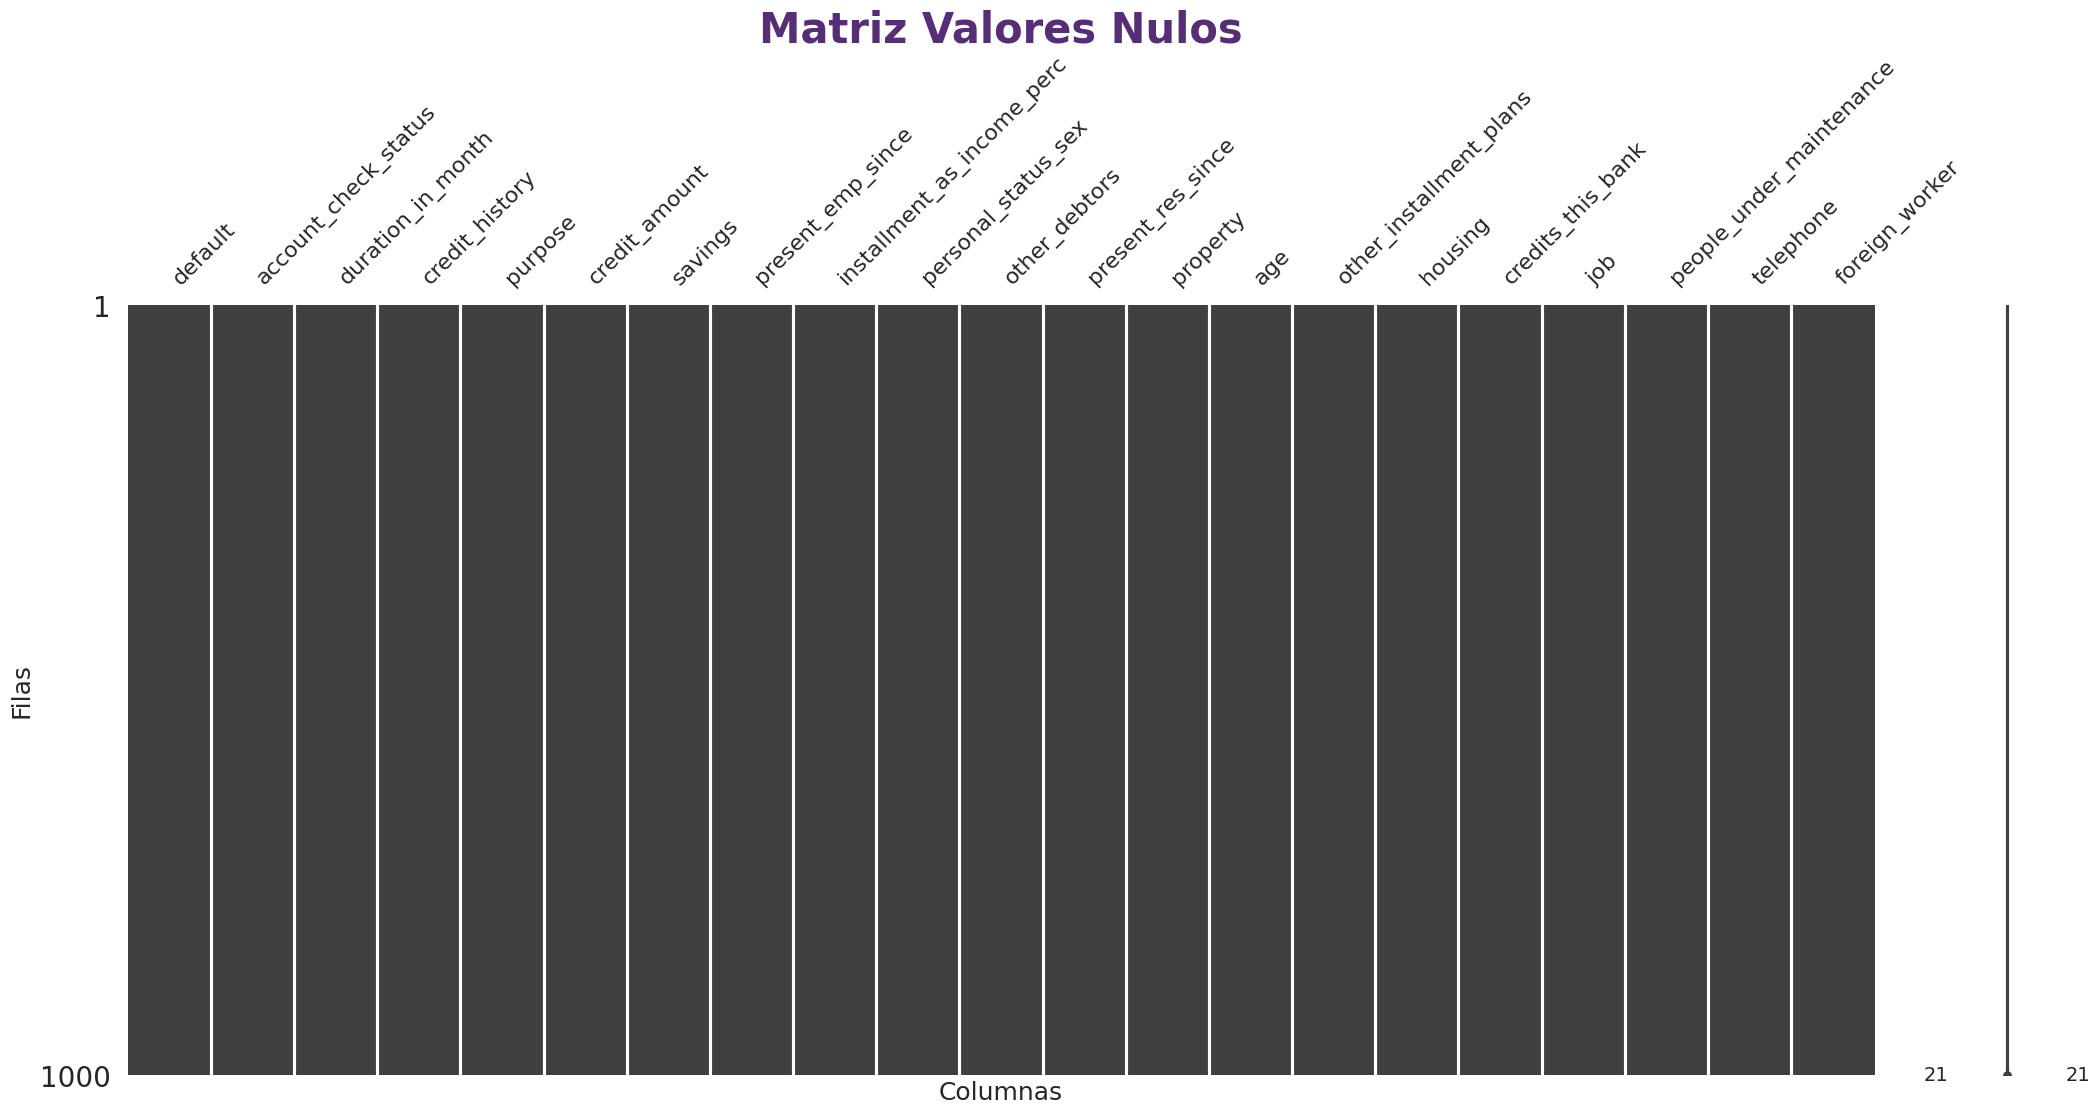

In [167]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_banco)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

Observamos que no existe presencia de datos nulos.


#### 2.3 EDA VARIABLES CATEGÓRICAS

In [170]:
def graficos_eda_categoricos(cat):

  #calculamos el número de filas que necesitamos
  from math import ceil
  filas =ceil(cat.shape[1]/2)

  #definimos el grafico
  f, ax = plt.subplots(nrows= filas, ncols=  2, figsize = (16, filas * 6))

  #aplanamos para iterar por el grafico como si fuera 1 dimension en lugar de 2
  ax = ax.flat

  #creamos el bucle que crea los grafico

  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax= ax[cada])
    ax[cada].set_title(variable,fontsize= 12, fontweight = 'bold')
    ax[cada].tick_params(labelsize = 12)

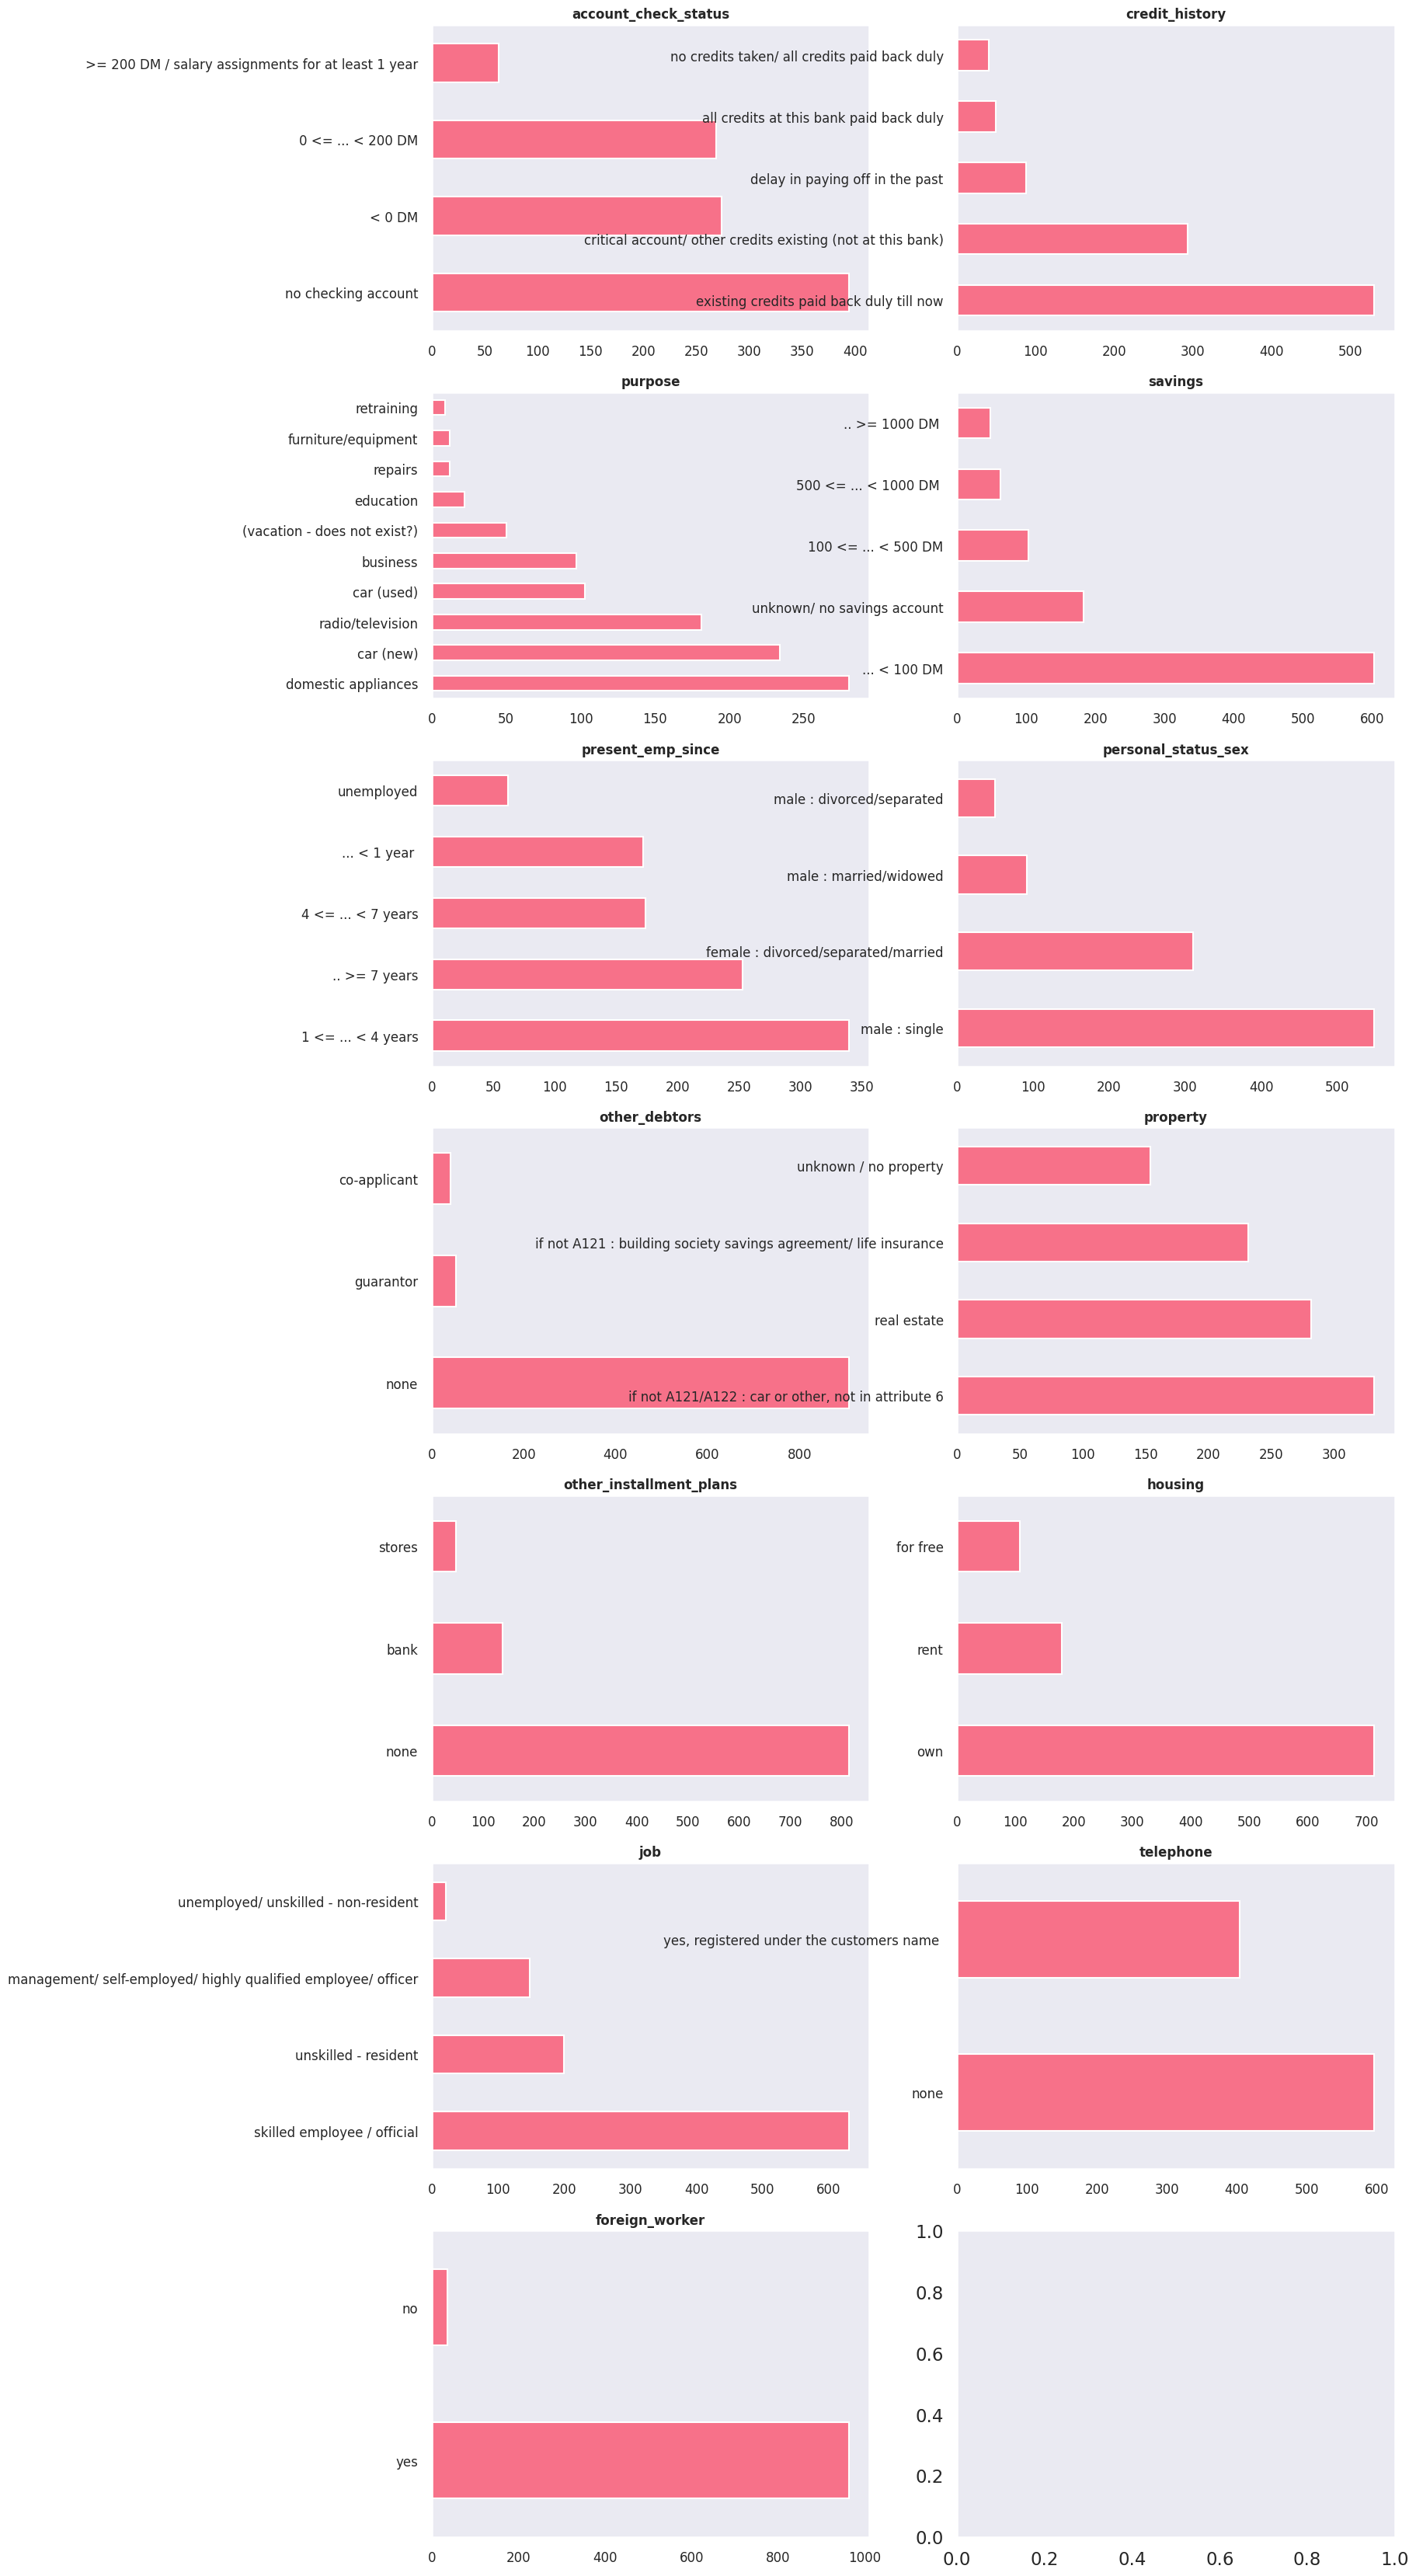

In [34]:
graficos_eda_categoricos(df_banco.select_dtypes('O'))

#### 2.4 EDA VARIABLES NUMÉRICAS

---


In [171]:
def estadisticos_cont(num):
  #calcular describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median']= num.median()
  #recordamos para la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #devolvemos
  return(estadisticos)

In [172]:
estadisticos_cont(df_banco.select_dtypes('number'))

count      mean  median          std    min  \
default                     1000.0     0.300     0.0     0.458487    0.0   
duration_in_month           1000.0    20.903    18.0    12.058814    4.0   
credit_amount               1000.0  3271.258  2319.5  2822.736876  250.0   
installment_as_income_perc  1000.0     2.973     3.0     1.118715    1.0   
present_res_since           1000.0     2.845     3.0     1.103718    1.0   
age                         1000.0    35.546    33.0    11.375469   19.0   
credits_this_bank           1000.0     1.407     1.0     0.577654    1.0   
people_under_maintenance    1000.0     1.155     1.0     0.362086    1.0   

                               25%     50%      75%      max  
default                        0.0     0.0     1.00      1.0  
duration_in_month             12.0    18.0    24.00     72.0  
credit_amount               1365.5  2319.5  3972.25  18424.0  
installment_as_income_perc     2.0     3.0     4.00      4.0  
present_res_since              2.0     3.0     4.00      4.0  
age                           27.0    33.0    42.00     75.0  
credits_this_bank              1.0     1.0     2.00      4.0  
people_under_maintenance       1.0     1.0     1.00      2.0

In [173]:
def procesar_datos():
    global df_banco, resultados

    # Eliminar registros duplicados y guardar en df_banco
    df_banco = df_banco.drop_duplicates()

    # Eliminar valores nulos
    df_banco = df_banco.dropna()

    # Codificación de variables categóricas
    # Se crea un diccionario para cada columna categórica y se realiza la codificación

    # 'account_check_status' 'estado_comprobación_cuenta'
    a = { '< 0 DM': 1, '0 <= ... < 200 DM': 2, '>= 200 DM / salary assignments for at least 1 year': 3, 'no checking account': 4 }
    df_banco['account_check_status'] = df_banco['account_check_status'].map(a).astype(int)

    # 'credit_history'
    b = {'no credits taken/ all credits paid back duly': 1, 'all credits at this bank paid back duly': 2,
         'existing credits paid back duly till now': 3, 'delay in paying off in the past': 4,
         'critical account/ other credits existing (not at this bank)': 5}
    df_banco['credit_history'] = df_banco['credit_history'].map(b).astype(int)

    # 'purpose' 'objetivo'
    c = { 'car (new)': 1, 'car (used)': 2, 'furniture/equipment': 3, 'radio/television': 4,
          'domestic appliances' : 5, 'repairs': 6, 'education': 7, '(vacation - does not exist?)': 8,
          'retraining': 9, 'business' : 10, 'others':11 }
    df_banco['purpose'] = df_banco['purpose'].map(c).astype(int)

    # 'savings' 'Ahorros'
    d = { 'unknown/ no savings account': 1, '.. >= 1000 DM ': 2, '500 <= ... < 1000 DM ': 3,
          '100 <= ... < 500 DM': 4, '... < 100 DM' : 5 }
    df_banco['savings'] = df_banco['savings'].map(d).astype(int)

    # 'present_emp_since' 'empleados presentes desde'
    e = { '.. >= 7 years': 1, '4 <= ... < 7 years': 2, '1 <= ... < 4 years': 3,
          '... < 1 year ': 4, 'unemployed' : 5 }
    df_banco['present_emp_since'] = df_banco['present_emp_since'].map(e).astype(int)

    # 'personal_status_sex'
    f = { 'male : divorced/separated': 1, 'female : divorced/separated/married': 2,
          'male : single': 3, 'male : married/widowed': 4, 'female : single' : 5 }
    df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(f).astype(int)

    # 'other_debtors' 'Otros deudores'
    g = { 'none': 1, 'co-applicant': 2, 'guarantor': 3 }
    df_banco['other_debtors'] = df_banco['other_debtors'].map(g).astype(int)

    # 'property' 'propiedad'
    h = {'real estate': 1, 'if not A121 : building society savings agreement/ life insurance': 2,
         'if not A121/A122 : car or other, not in attribute 6': 3, 'unknown / no property': 4 }
    df_banco['property'] = df_banco['property'].map(h).astype(int)

    # 'other_installment_plans' 'otros planes de instalación'
    i = { 'bank': 1, 'stores': 2, 'none': 3 }
    df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(i).astype(int)

    # 'housing' 'Alojamiento'
    j = { 'rent': 1, 'own': 2, 'for free': 3 }
    df_banco['housing'] = df_banco['housing'].map(j).astype(int)

    # 'job' 'trabajo'
    k = { 'unemployed/ unskilled - non-resident': 1, 'unskilled - resident': 2,
          'skilled employee / official': 3, 'management/ self-employed/ highly qualified employee/ officer': 4 }
    df_banco['job'] = df_banco['job'].map(k).astype(int)

    # 'telephone'
    l = { 'none': 0, 'yes, registered under the customers name ': 1 }
    df_banco['telephone'] = df_banco['telephone'].map(l).astype(int)

    # 'foreign_worker'
    m = { 'no': 0, 'yes': 1 }
    df_banco['foreign_worker'] = df_banco['foreign_worker'].map(m).astype(int)


In [174]:
procesar_datos()
df_banco.sample(5)

default  account_check_status  duration_in_month  credit_history  \
800        0                     4                 24               5   
523        0                     4                 24               3   
258        0                     4                 15               3   
895        0                     4                 36               4   
780        1                     2                 39               5   

     purpose  credit_amount  savings  present_emp_since  \
800        8           1597        5                  1   
523        2           3488        4                  2   
258        2           3812        4                  4   
895        2           8947        1                  2   
780        5           4933        5                  2   

     installment_as_income_perc  personal_status_sex  other_debtors  \
800                           4                    3              1   
523                           3                    2              1   
258                           1                    2              1   
895                           3                    3              1   
780                           2                    3              3   

     present_res_since  property  age  other_installment_plans  housing  \
800                  4         4   54                        3        3   
523                  4         3   23                        3        2   
258                  4         3   23                        3        2   
895                  2         3   31                        2        2   
780                  2         1   25                        3        2   

     credits_this_bank  job  people_under_maintenance  telephone  \
800                  2    3                         2          0   
523                  1    3                         1          0   
258                  1    3                         1          1   
895                  1    4                         2          1   
780                  2    3                         1          0   

     foreign_worker  
800               1  
523               1  
258               1  
895               1  
780               1

In [175]:
#Verificamos si después de la sustitución quedó algún valor nulo
df_banco.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [176]:
#Verificamos si las estructuras de datos de las columnas son las correctas
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

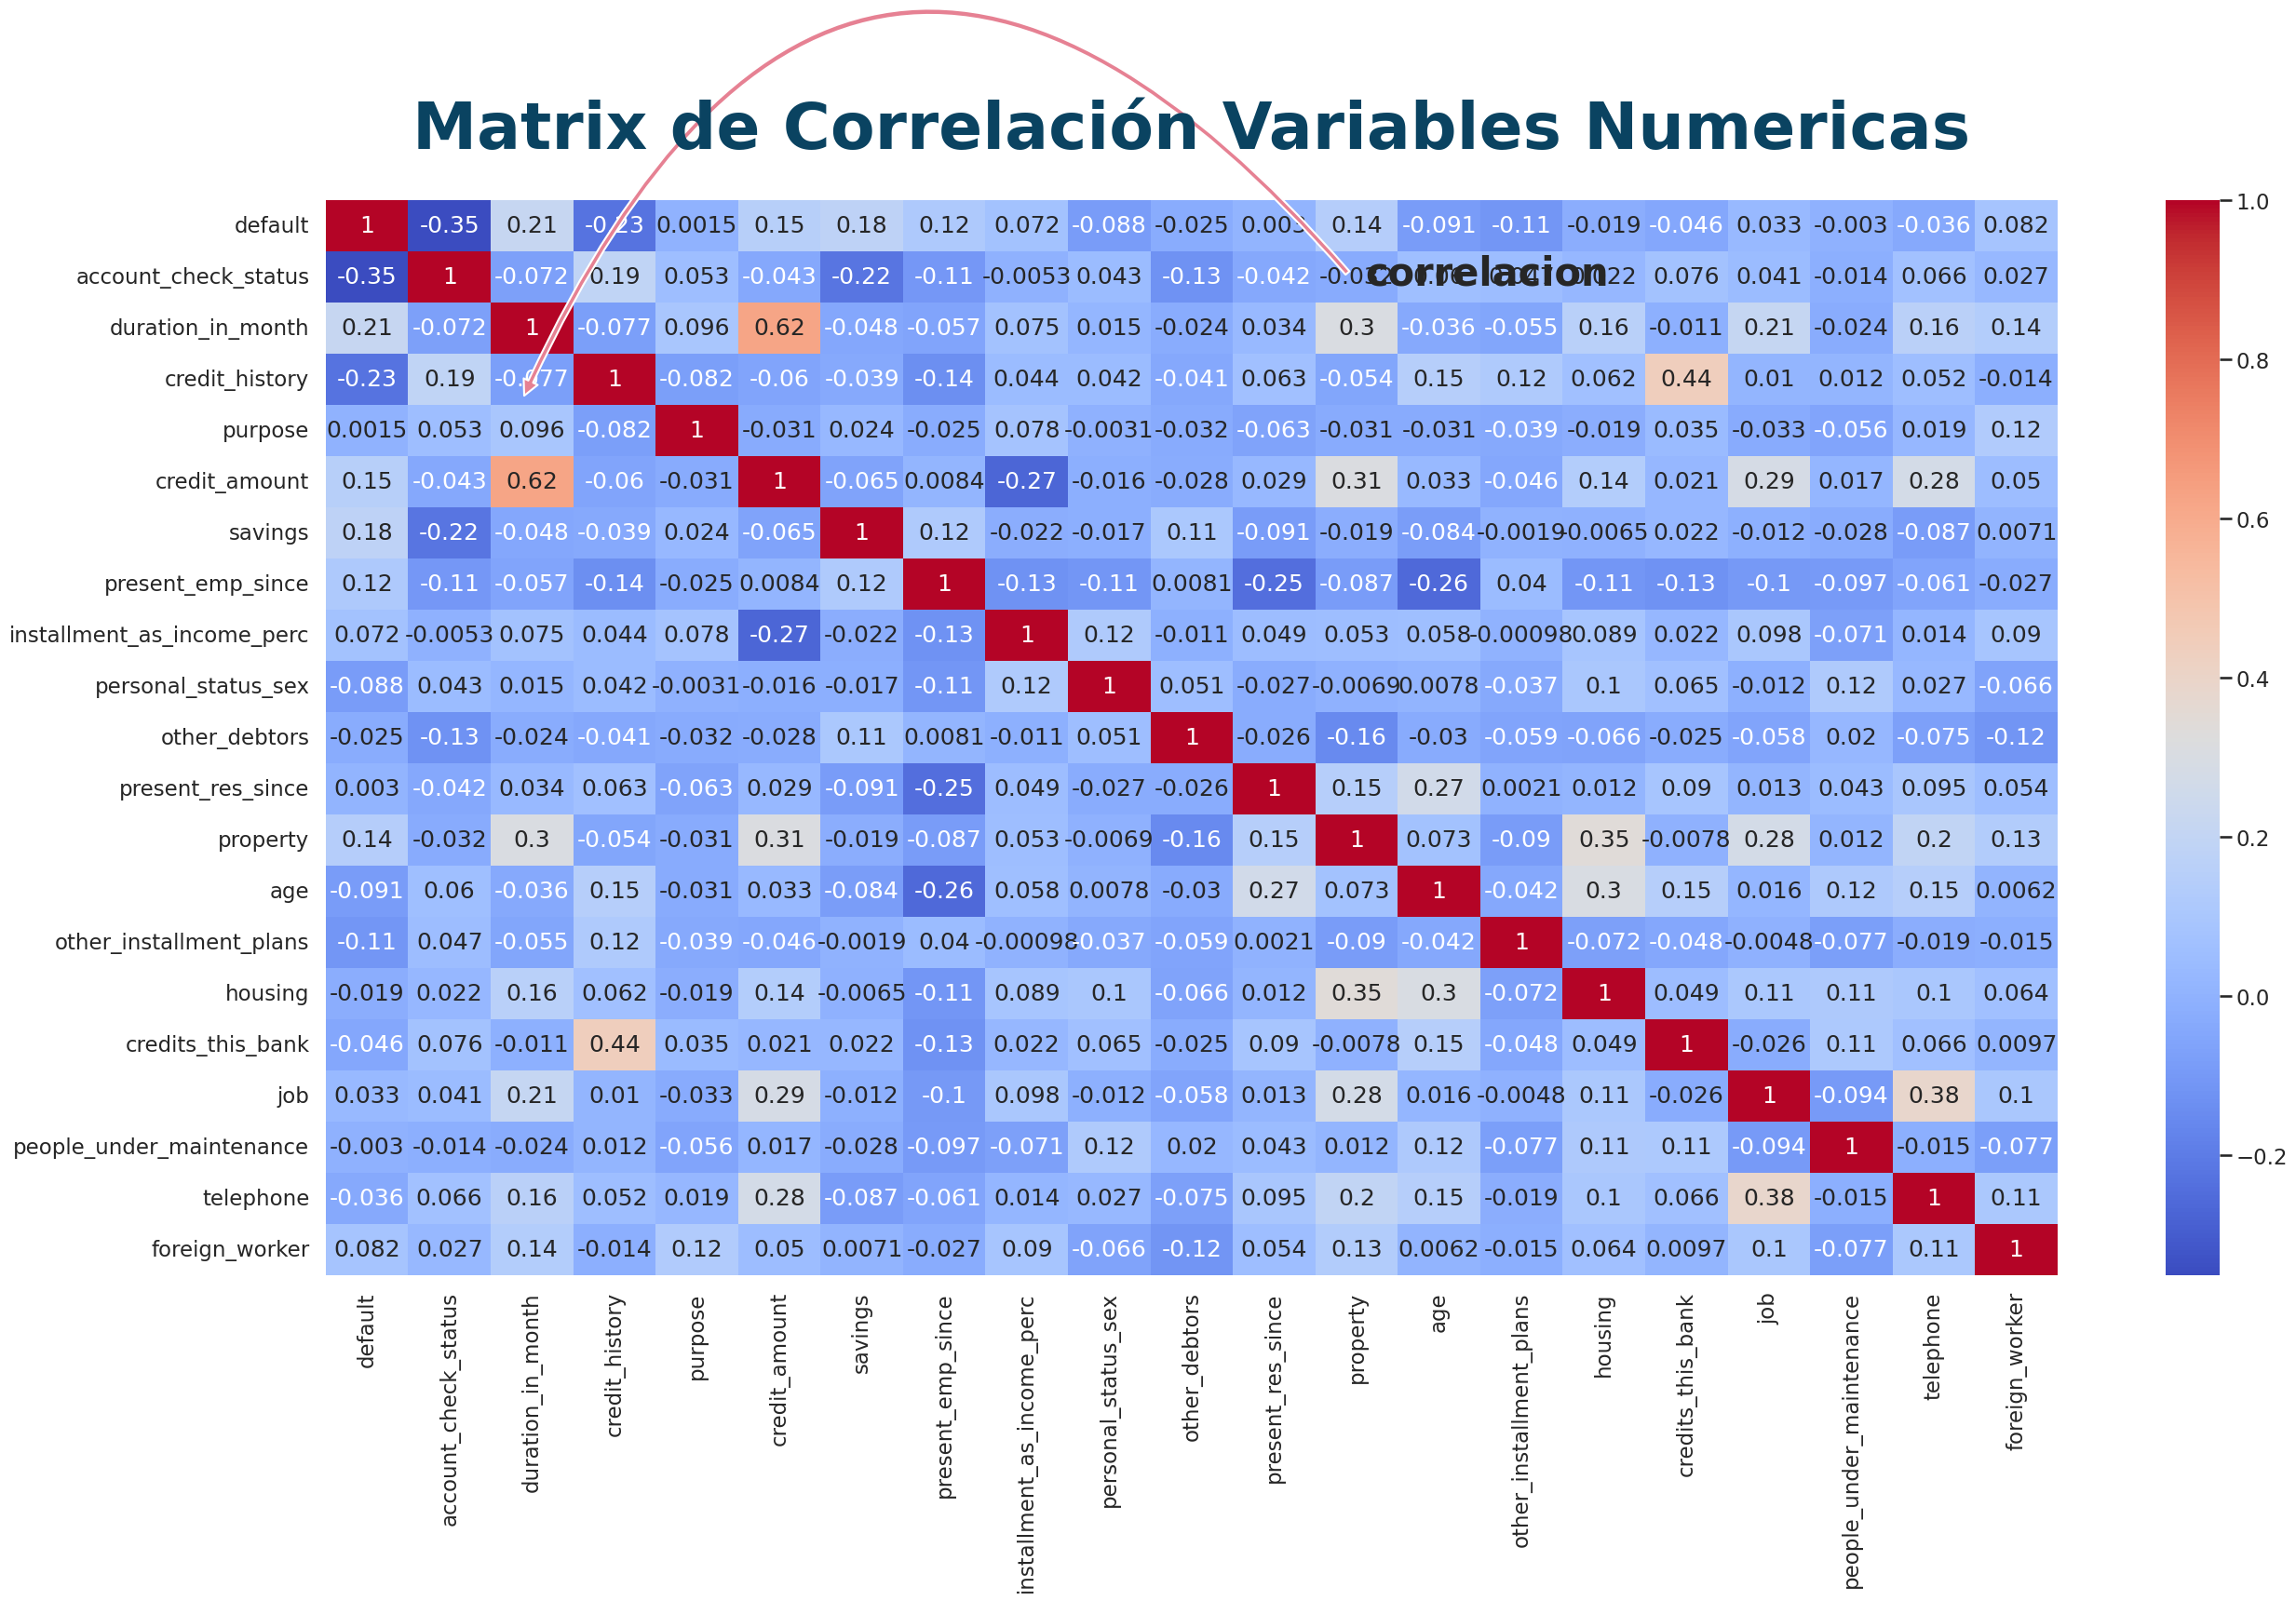

In [177]:
#Correlación Entre Variables Numéricas
corr=df_banco.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_banco.corr(), rotation = 0)
ax.set_xticklabels(df_banco.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()

In [178]:
#Información de los datos
print("Número de filas: ",df_banco.shape[0])
print("Número de Columnas:",df_banco.shape[1])
print("Datos Duplicados",df_banco.duplicated().sum())
print("Variables Categóricas: ",df_banco.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_banco.select_dtypes(exclude='object').shape[1])

Número de filas:  1000
Número de Columnas: 21
Datos Duplicados 0
Variables Categóricas:  0
Variables Numéricas:  21


#**3. Exploración de Datos**


---


In [179]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].head()

personal_status_sex  age  duration_in_month  credit_amount  default
0                    3   67                  6           1169        0
1                    2   22                 48           5951        1
2                    3   49                 12           2096        0
3                    3   45                 42           7882        0
4                    3   53                 24           4870        1

In [180]:
def feature_engineering():
    global df_banco, resultados

     # Verificar y llenar valores nulos en columnas relevantes
    columns_with_nans = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount']
    df_banco[columns_with_nans] = df_banco[columns_with_nans].fillna(0)  # Puedes cambiar 0 por otro valor por defecto si es necesario

    # Crear una nueva variable 'sexo'
    sexo = {1: 0, 2: 1, 3: 0, 4: 0, 5: 1}
    # Crear una nueva variable 'estado_civil'
    estado_civil={1: 0, 2: 0, 3: 1, 4: 0, 5: 1}
    df_banco['sexo'] = df_banco['personal_status_sex'].map(sexo).astype(int)
    df_banco['estado_civil'] = df_banco['personal_status_sex'].map(estado_civil).astype(int)

     # Crear una nueva variable 'rango_edad'
    bins_edad = [18, 30, 40, 50, 60, 70, 80]
    labels_edad = [1, 2, 3, 4, 5, 6]
    df_banco['rango_edad'] = pd.cut(x=df_banco['age'], bins=bins_edad, labels=labels_edad).astype(int)

    # Crear una nueva variable 'rango_plazos_credito'
    bins_plazos = [0, 12, 24, 36, 48, 60, 72]
    labels_plazos = [1, 2, 3, 4, 5, 6]
    df_banco['rango_plazos_credito'] = pd.cut(x=df_banco['duration_in_month'], bins=bins_plazos, labels=labels_plazos).astype(int)

    # Crear una nueva variable 'rango_valor_credito'
    bins_valor = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    labels_valor = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    df_banco['rango_valor_credito'] = pd.cut(x=df_banco['credit_amount'], bins=bins_valor, labels=labels_valor)

    # Eliminar las columnas originales
    columnas_a_eliminar = ['personal_status_sex', 'credit_amount']
    df_banco = df_banco.drop(columns=columnas_a_eliminar)

    # Actualizar la variable global resultados si es necesario
    resultados = "Feature engineering completado con éxito"

# Llamada a la función de feature engineering
feature_engineering()

# Puedes imprimir o hacer lo que necesites con df_banco y resultados después de llamar a la función.
df_banco.head()
print(resultados)

Feature engineering completado con éxito


In [183]:
df_banco.head(10)

default  account_check_status  duration_in_month  credit_history  purpose  \
0        0                     1                  6               5        5   
1        1                     2                 48               3        5   
2        0                     4                 12               5        8   
3        0                     1                 42               3        4   
4        1                     1                 24               4        1   
5        0                     4                 36               3        8   
6        0                     4                 24               3        4   
7        0                     2                 36               3        2   
8        0                     4                 12               3        5   
9        1                     2                 30               5        1   

   savings  present_emp_since  installment_as_income_perc  other_debtors  \
0        1                  1                           4              1   
1        5                  3                           2              1   
2        5                  2                           2              1   
3        5                  2                           2              3   
4        5                  3                           3              1   
5        1                  3                           2              1   
6        3                  1                           3              1   
7        5                  3                           2              1   
8        2                  2                           2              1   
9        5                  5                           4              1   

   present_res_since  property  age  other_installment_plans  housing  \
0                  4         1   67                        3        2   
1                  2         1   22                        3        2   
2                  3         1   49                        3        2   
3                  4         2   45                        3        3   
4                  4         4   53                        3        3   
5                  4         4   35                        3        3   
6                  4         2   53                        3        2   
7                  2         3   35                        3        1   
8                  4         1   61                        3        2   
9                  2         3   28                        3        2   

   credits_this_bank  job  people_under_maintenance  telephone  \
0                  2    3                         1          1   
1                  1    3                         1          0   
2                  1    2                         2          0   
3                  1    3                         2          0   
4                  2    3                         2          0   
5                  1    2                         2          1   
6                  1    3                         1          0   
7                  1    4                         1          1   
8                  1    2                         1          0   
9                  2    4                         1          0   

   foreign_worker  sexo  estado_civil  rango_edad  rango_plazos_credito  \
0               1     0             1           5                     1   
1               1     1             0           1                     4   
2               1     0             1           3                     1   
3               1     0             1           3                     4   
4               1     0             1           4                     2   
5               1     0             1           2                     3   
6               1     0             1           4                     2   
7               1     0             1           2                     3   
8               1     0             0           5                     1   
9   

In [184]:
def analisis_exploratorio():
    global df_banco,resultados

    # Generar gráficos de histograma con porcentajes
    atributos_histograma = ['default','account_check_status','credit_history','purpose','savings','present_emp_since','installment_as_income_perc','other_debtors',
            'present_res_since','property','other_installment_plans','housing','credits_this_bank','job','people_under_maintenance','telephone',
            'foreign_worker','sexo','estado_civil','rango_edad','rango_plazos_credito','rango_valor_credito']
    generar_histogramas_plotly(atributos_histograma)

def generar_histogramas_plotly(atributos):
    for atributo in atributos:
        fig = px.histogram(df_banco, x=atributo, color='default', labels={'default': 'Estado de Crédito'})
        fig.update_layout(
            title=f'Histograma de {atributo} con Porcentajes',
            xaxis_title=atributo,
            yaxis_title='Frecuencia',
            barmode='group',
            showlegend=True
        )
        fig.update_traces(opacity=0.7)
        fig.show()

fig.show()

# Llamada a la función de análisis exploratorio
analisis_exploratorio()


In [185]:
f_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   default                     1000 non-null   int64   
 1   account_check_status        1000 non-null   int64   
 2   duration_in_month           1000 non-null   int64   
 3   credit_history              1000 non-null   int64   
 4   purpose                     1000 non-null   int64   
 5   savings                     1000 non-null   int64   
 6   present_emp_since           1000 non-null   int64   
 7   installment_as_income_perc  1000 non-null   int64   
 8   other_debtors               1000 non-null   int64   
 9   present_res_since           1000 non-null   int64   
 10  property                    1000 non-null   int64   
 11  age                         1000 non-null   int64   
 12  other_installment_plans     1000 non-null   int64   
 13  housing            

In [ ]:
# Convertir la columna "rango_valor_credito" de categórica a numérica
df_banco["rango_valor_credito"] = pd.to_numeric(df_banco["rango_valor_credito"], errors='coerce')
# Reemplazar los valores nulos en la columna "rango_valor_credito" con 0
df_banco["rango_valor_credito"].fillna(0, inplace=True)
# Imprimir el DataFrame después de realizar las modificaciones
print(df_banco["rango_valor_credito"])


In [201]:
# Biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

def balanceo_de_datos():
    global df_banco, resultados

    # Dividiendo los datos en características y target
    X = df_banco.drop('default', axis=1)
    y = df_banco['default']

    smt = SMOTE(random_state=123)
    X_resampled, y_resampled = smt.fit_resample(X, y)

    # Unión de los datos balanceados
    df_banco = pd.concat([X_resampled, y_resampled], axis=1)


In [188]:
balanceo_de_datos()

In [189]:
analisis_exploratorio()

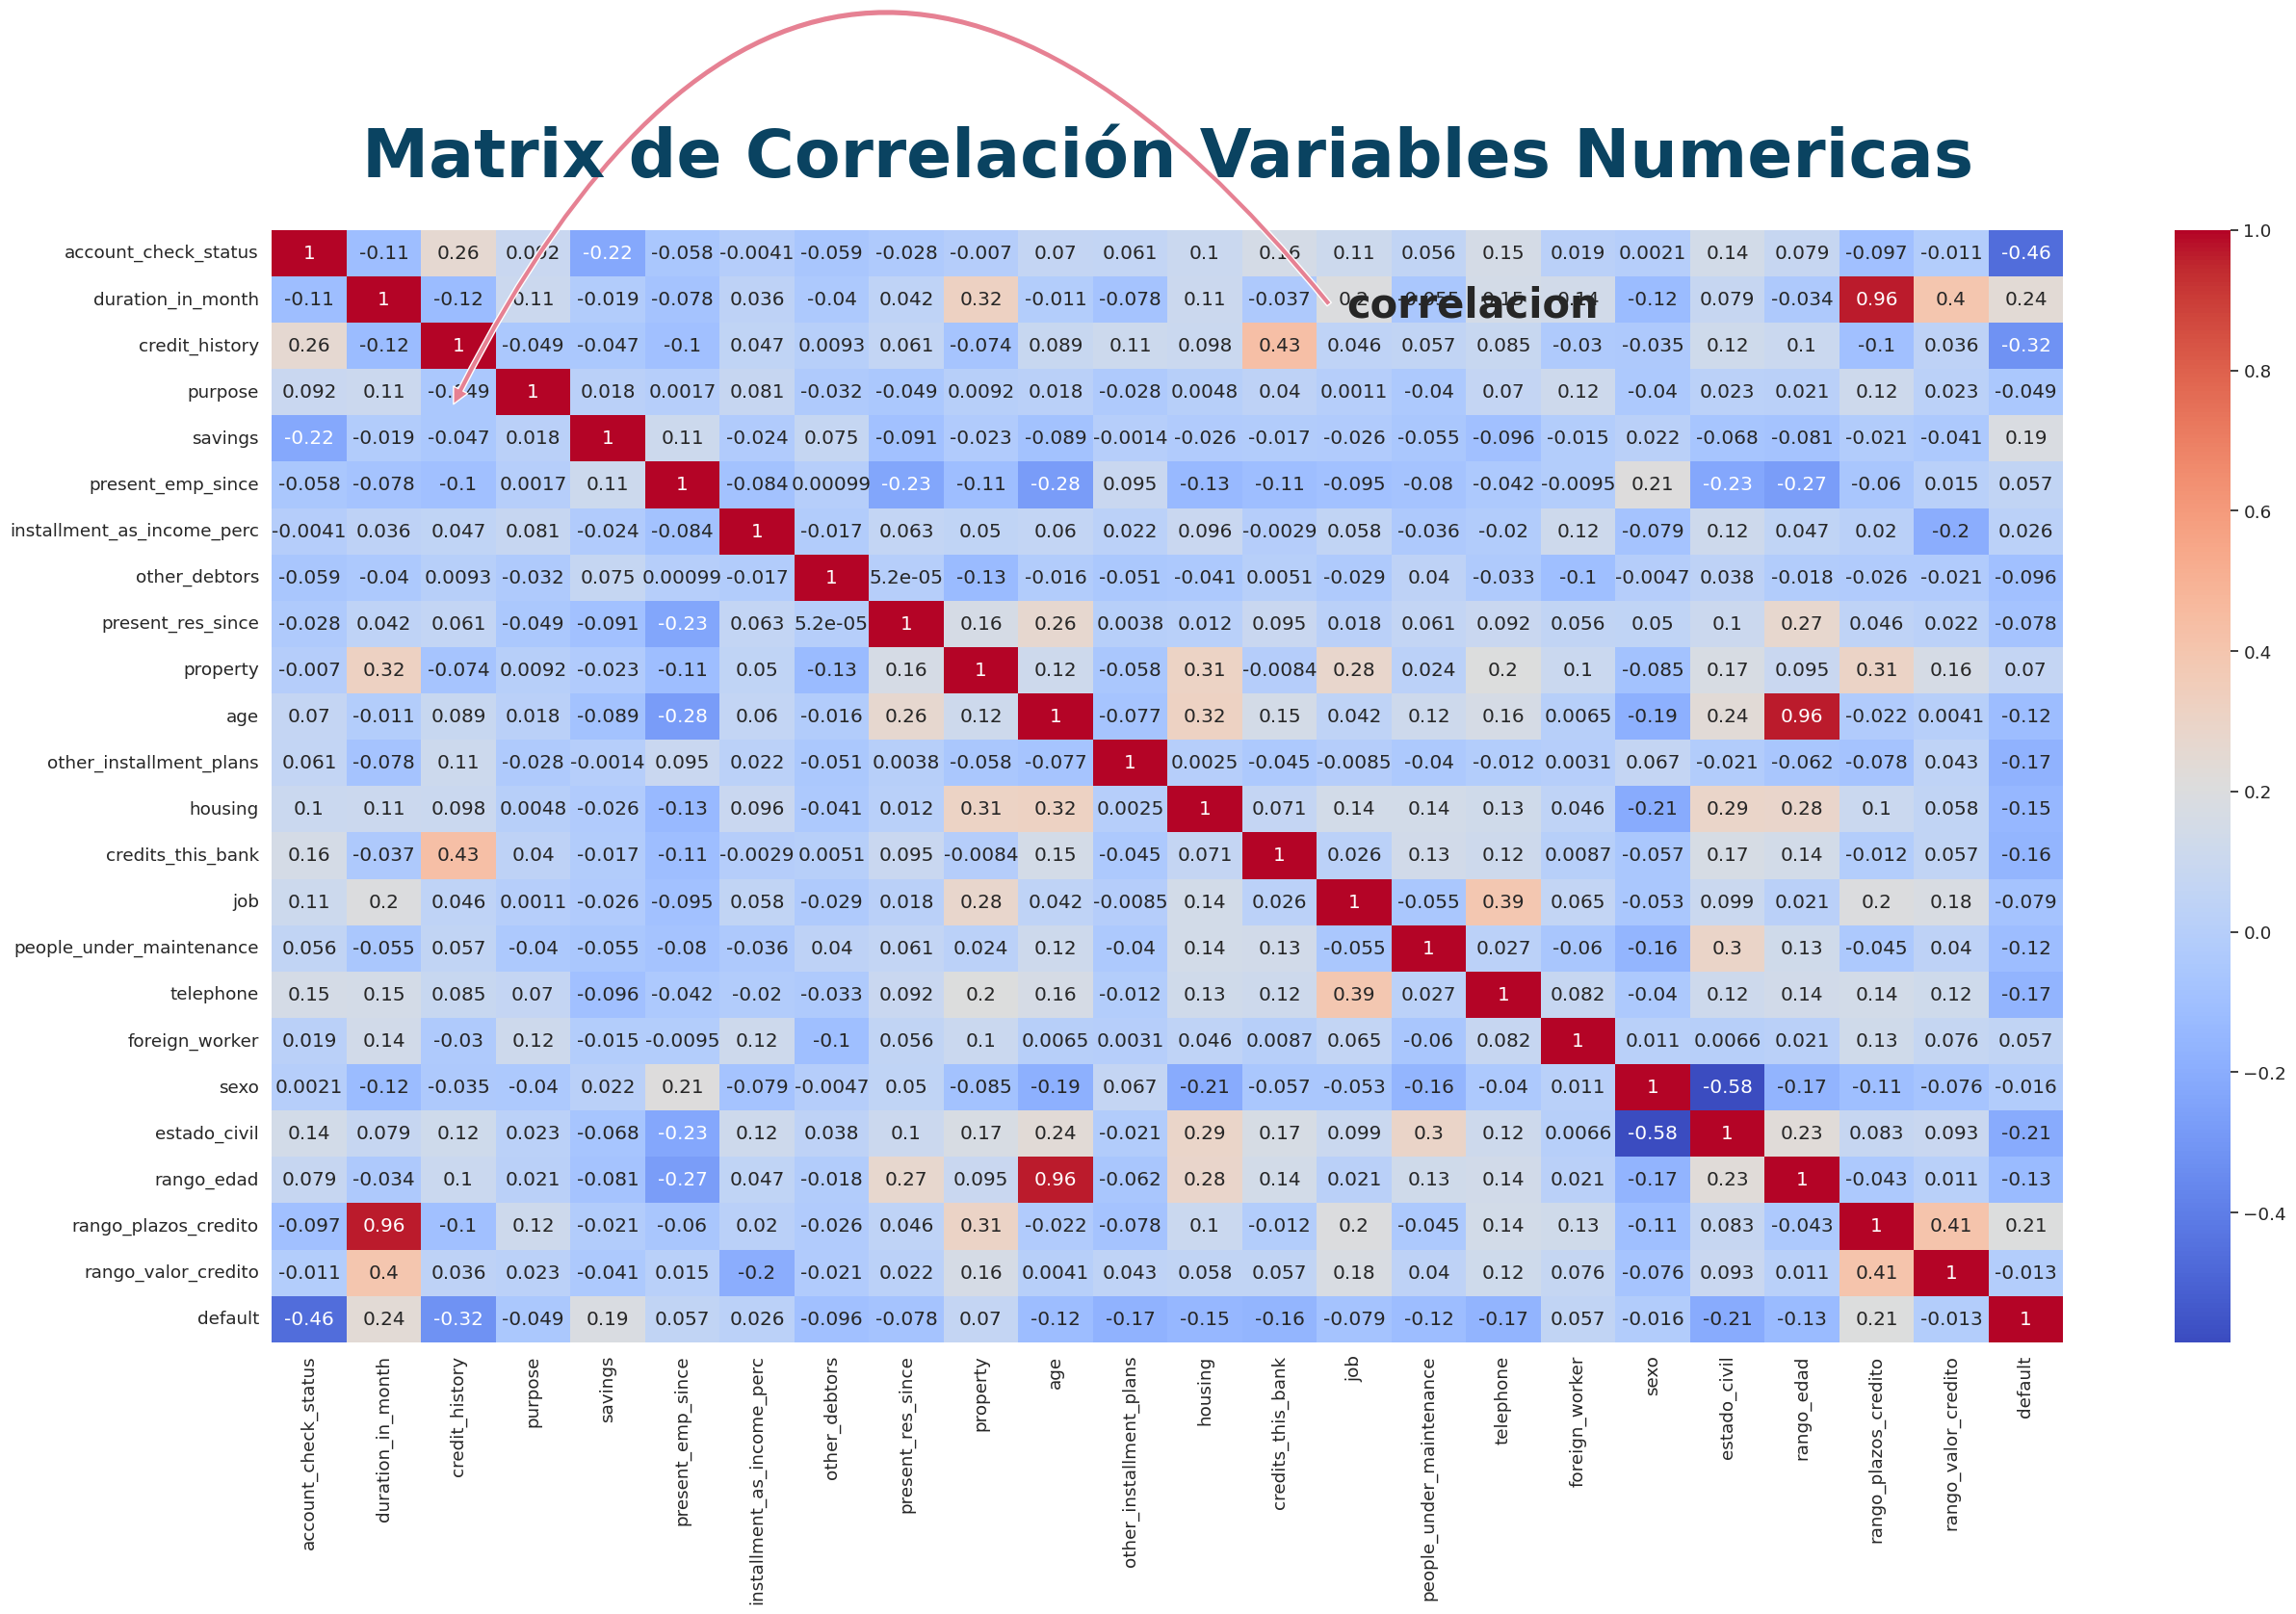

In [203]:
#Correlación Entre Variables Numéricas
corr=df_banco.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_banco.corr(), rotation = 0)
ax.set_xticklabels(df_banco.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()

In [204]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_check_status        1400 non-null   int64  
 1   duration_in_month           1400 non-null   int64  
 2   credit_history              1400 non-null   int64  
 3   purpose                     1400 non-null   int64  
 4   savings                     1400 non-null   int64  
 5   present_emp_since           1400 non-null   int64  
 6   installment_as_income_perc  1400 non-null   int64  
 7   other_debtors               1400 non-null   int64  
 8   present_res_since           1400 non-null   int64  
 9   property                    1400 non-null   int64  
 10  age                         1400 non-null   int64  
 11  other_installment_plans     1400 non-null   int64  
 12  housing                     1400 non-null   int64  
 13  credits_this_bank           1400 

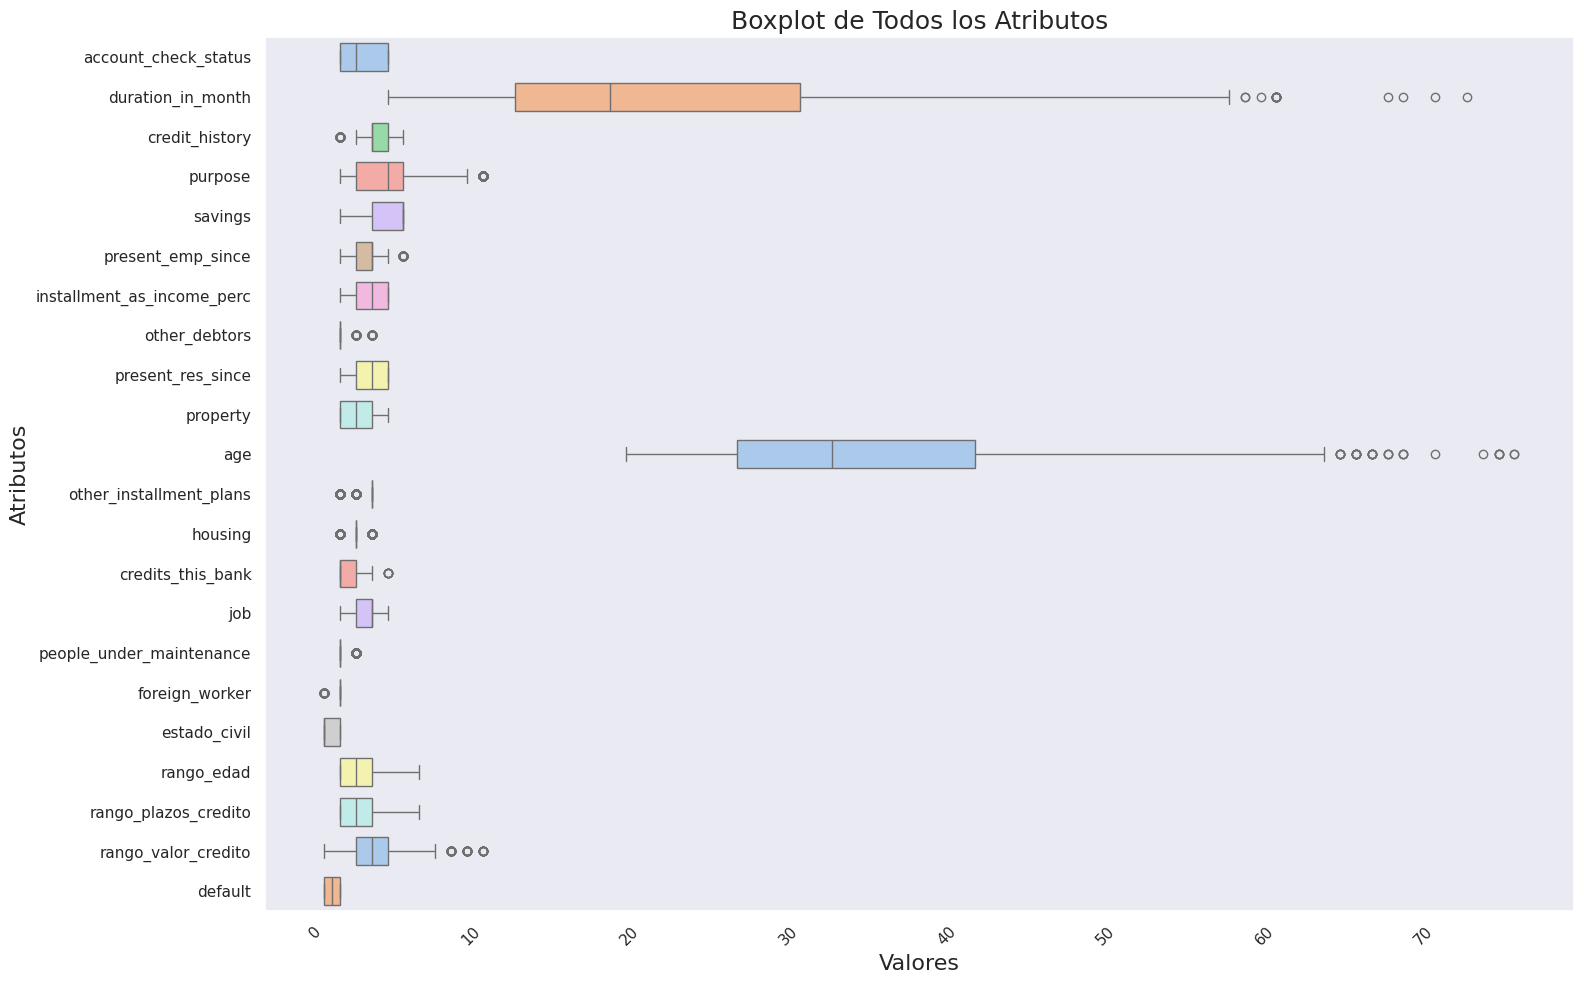

In [222]:
# Configuración de estilo y tamaño
sns.set(style="dark")
plt.figure(figsize=(16, 10))

# Crear un boxplot con Seaborn
sns.boxplot(data=df_banco, orient="h", palette="pastel", width=0.7)

# Personalizar el diseño del gráfico
plt.title('Boxplot de Todos los Atributos', fontsize=18)
plt.xlabel('Valores', fontsize=16)
plt.ylabel('Atributos', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Mostrar el gráfico
plt.show()




In [ ]:
print(df_banco.groupby(['estado_civil', 'sexo']).size())

In [ ]:
#Eliminamos la columna sexo del dataFrame
df_banco.drop(['sexo'], axis=1, inplace=True)

In [220]:
df_banco.drop(['telephone'], axis=1, inplace=True)


KeyError: "['telephone'] not found in axis"

In [ ]:
df_banco.drop(['purpose'], axis=1, inplace=True)

In [224]:
df_banco[df_banco['rango_plazos_credito']==6]

account_check_status  duration_in_month  credit_history  purpose  \
677                     2                 72               3        5   

     savings  present_emp_since  installment_as_income_perc  other_debtors  \
677        4                  3                           2              1   

     present_res_since  property  age  other_installment_plans  housing  \
677                  2         3   24                        3        2   

     credits_this_bank  job  people_under_maintenance  foreign_worker  \
677                  1    3                         1               1   

     estado_civil  rango_edad  rango_plazos_credito  rango_valor_credito  \
677             0           1                     6                  6.0   

     default  
677        1

In [226]:
df_banco[df_banco['rango_edad']==6]

account_check_status  duration_in_month  credit_history  purpose  \
186                     2                  9               2        2   
330                     1                 24               5        2   
430                     4                  5               3       10   
536                     1                  6               3        1   
606                     4                 24               5       10   
756                     3                  6               5        1   

     savings  present_emp_since  installment_as_income_perc  other_debtors  \
186        5                  1                           2              1   
330        5                  5                           2              1   
430        5                  2                           1              1   
536        1                  5                           4              1   
606        5                  3                           3              1   
756        5                  3                           1              1   

     present_res_since  property  age  other_installment_plans  housing  \
186                  4         4   74                        1        3   
330                  4         4   75                        3        3   
430                  4         1   74                        3        2   
536                  3         2   75                        3        2   
606                  2         1   74                        3        2   
756                  1         1   74                        3        2   

     credits_this_bank  job  people_under_maintenance  foreign_worker  \
186                  1    4                         2               1   
330                  2    4                         1               1   
430                  1    2                         1               1   
536                  1    4                         1               1   
606                  1    4                         1               1   
756                  3    1                         2               0   

     estado_civil  rango_edad  rango_plazos_credito  rango_valor_credito  \
186             0           6                     1                  6.0   
330             1           6                     2                  7.0   
430             1           6                     1                  4.0   
536             0           6                     1                  2.0   
606             1           6                     2                  5.0   
756             1           6                     1                  2.0   

     default  
186        1  
330        0  
430        0  
536        0  
606        0  
756        0

In [227]:
# Eliminar todas las filas donde 'rango_edad' es igual a 6
df_banco = df_banco[(df_banco['rango_edad'] != 6)].reset_index(drop=True)
df_banco = df_banco[(df_banco['rango_plazos_credito'] != 6)].reset_index(drop=True)

In [231]:
df_banco.columns

Index(['account_check_status', 'duration_in_month', 'credit_history',
       'purpose', 'savings', 'present_emp_since', 'installment_as_income_perc',
       'other_debtors', 'present_res_since', 'property', 'age',
       'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'foreign_worker', 'estado_civil',
       'rango_edad', 'rango_plazos_credito', 'rango_valor_credito', 'default'],
      dtype='object')

In [232]:
def analisis_exploratorio2():
    global df_banco,resultados

    # Generar gráficos de histograma con porcentajes
    atributos_histograma = ['account_check_status', 'duration_in_month', 'credit_history',
       'purpose', 'savings', 'present_emp_since', 'installment_as_income_perc',
       'other_debtors', 'present_res_since', 'property', 'age',
       'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'foreign_worker', 'estado_civil',
       'rango_edad', 'rango_plazos_credito', 'rango_valor_credito', 'default']
    generar_histogramas_plotly(atributos_histograma)

def generar_histogramas_plotly(atributos):
    for atributo in atributos:
        fig = px.histogram(df_banco, x=atributo, color='default', labels={'default': 'Estado de Crédito'})
        fig.update_layout(
            title=f'Histograma de {atributo} con Porcentajes',
            xaxis_title=atributo,
            yaxis_title='Frecuencia',
            barmode='group',
            showlegend=True
        )
        fig.update_traces(opacity=0.7)
        fig.show()

fig.show()

# Llamada a la función de análisis exploratorio
analisis_exploratorio2()


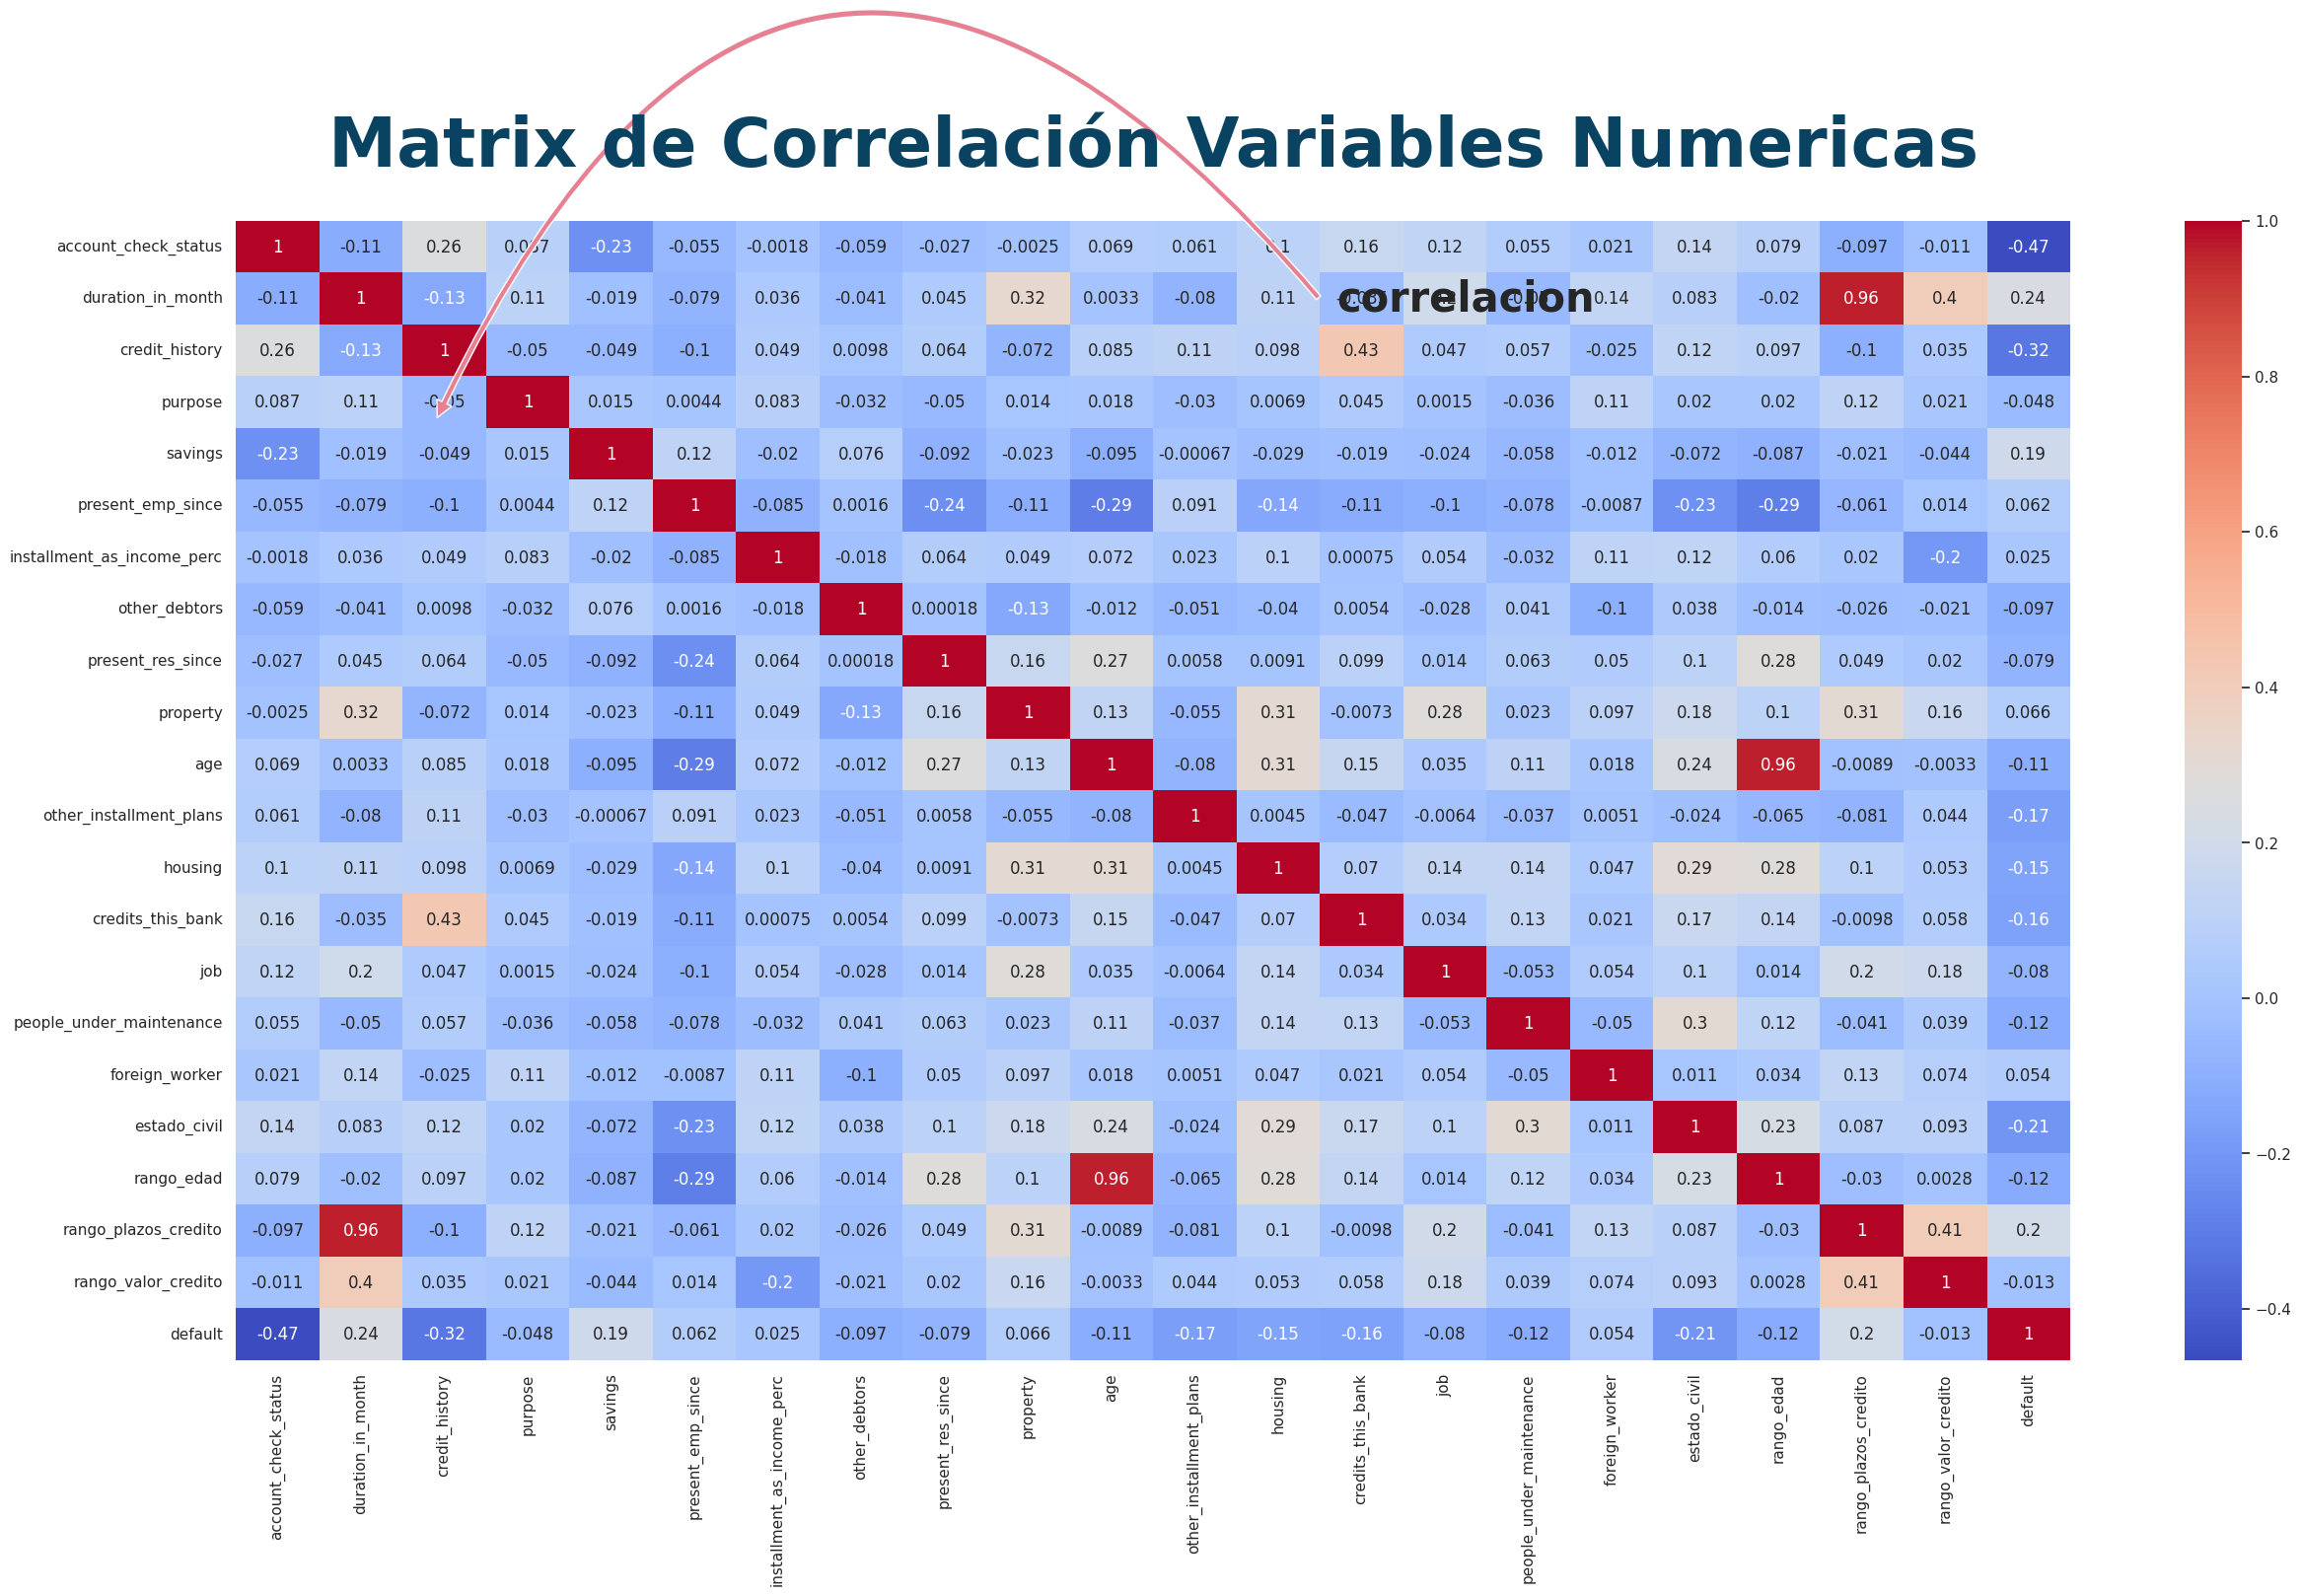

In [233]:
#Correlación Entre Variables Numéricas
corr=df_banco.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_banco.corr(), rotation = 0)
ax.set_xticklabels(df_banco.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()

In [154]:
df_banco["default"].value_counts()

0    700
1    300
Name: default, dtype: int64

In [215]:
# Obtener la cuenta de valores únicos en la columna 'default'
value_counts = df_banco["default"].value_counts()

# Crear un gráfico de barras con Plotly Express
fig = px.bar(x=value_counts.index, y=value_counts.values, text=value_counts.values,
             labels={'x': 'default', 'y': 'Count'}, title='Cuenta de valores en la columna "default"')

# Mostrar el gráfico
fig.show()
